# This is the notebook focused on creating an algotrading bot #

The ambition  of this project is to create an **algotrading** bot capable of investing in the stock market. This has been possible thanks to the help of Elio, Hugo, and Nassim. for a programming class at Télécom Paris.

Let's for starter import the **dependencies**

In [14]:
import yfinance as yf #Using data from Yahoo Fiance
import pandas as pd #DataFrame structure
import numpy as np #Math on C
import matplotlib.pyplot as plt #Plotting

In [15]:
ticker=["SPY","AAPL","MSFT"]
stocks=yf.download(ticker,start="2010-01-01",end="2022-01-01")

[*********************100%***********************]  3 of 3 completed


In [16]:
stocks.tail()

Adj Close                               Close              \
                  AAPL        MSFT         SPY        AAPL        MSFT   
Date                                                                     
2021-12-27  179.016129  338.423309  469.640900  180.330002  342.450012   
2021-12-28  177.983688  337.237457  469.257050  179.289993  341.250000   
2021-12-29  178.073029  337.929230  469.857361  179.380005  341.950012   
2021-12-30  176.901627  335.330170  468.558472  178.199997  339.320007   
2021-12-31  176.276230  332.365417  467.377563  177.570007  336.320007   

                              High                                 Low  \
                   SPY        AAPL        MSFT         SPY        AAPL   
Date                                                                     
2021-12-27  477.260010  180.419998  342.480011  477.309998  177.070007   
2021-12-28  476.869995  181.330002  343.809998  478.809998  178.529999   
2021-12-29  477.480011  180.630005  344.299988  478.559998  178.139999   
2021-12-30  476.160004  180.570007  343.130005  479.000000  178.089996   
2021-12-31  474.959991  179.229996  339.359985  476.859985  177.259995   

                                          Open                          \
                  MSFT         SPY        AAPL        MSFT         SPY   
Date                                                                     
2021-12-27  335.429993  472.010010  177.089996  335.459991  472.059998   
2021-12-28  340.320007  476.059998  180.160004  343.149994  477.720001   
2021-12-29  339.679993  475.920013  179.330002  341.299988  476.980011   
2021-12-30  338.820007  475.670013  179.470001  341.910004  477.929993   
2021-12-31  335.850006  474.670013  178.089996  338.510010  475.640015   

              Volume                      
                AAPL      MSFT       SPY  
Date                                      
2021-12-27  74919600  19947000  56808600  
2021-12-28  79144300  15661500  47274600  
2021-12-29  62348900  15042000  54503000  
2021-12-30  59773000  15994500  55329000  
2021-12-31  64062300  18000800  65237400

In [17]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3021 entries, 2010-01-04 to 2021-12-31
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  3021 non-null   float64
 1   (Adj Close, MSFT)  3021 non-null   float64
 2   (Adj Close, SPY)   3021 non-null   float64
 3   (Close, AAPL)      3021 non-null   float64
 4   (Close, MSFT)      3021 non-null   float64
 5   (Close, SPY)       3021 non-null   float64
 6   (High, AAPL)       3021 non-null   float64
 7   (High, MSFT)       3021 non-null   float64
 8   (High, SPY)        3021 non-null   float64
 9   (Low, AAPL)        3021 non-null   float64
 10  (Low, MSFT)        3021 non-null   float64
 11  (Low, SPY)         3021 non-null   float64
 12  (Open, AAPL)       3021 non-null   float64
 13  (Open, MSFT)       3021 non-null   float64
 14  (Open, SPY)        3021 non-null   float64
 15  (Volume, AAPL)     3021 non-null   int64  
 16  (Volum

It seems that the Yahoo Finance API is working correctly

In [18]:
stocks.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT'),
            (   'Volume',  'SPY')],
           )

In [21]:
close= stocks.loc[:,"Close"].copy()

In [23]:
close.head()


,AAPL,MSFT,SPY
Date,,,
2010-01-04,7.643214,30.950001,113.330002
2010-01-05,7.656429,30.959999,113.629997
2010-01-06,7.534643,30.770000,113.709999
2010-01-07,7.520714,30.450001,114.190002
2010-01-08,7.570714,30.660000,114.570000


In [24]:
%matplotlib inline
plt.style.use("bmh")

<Axes: xlabel='Date'>

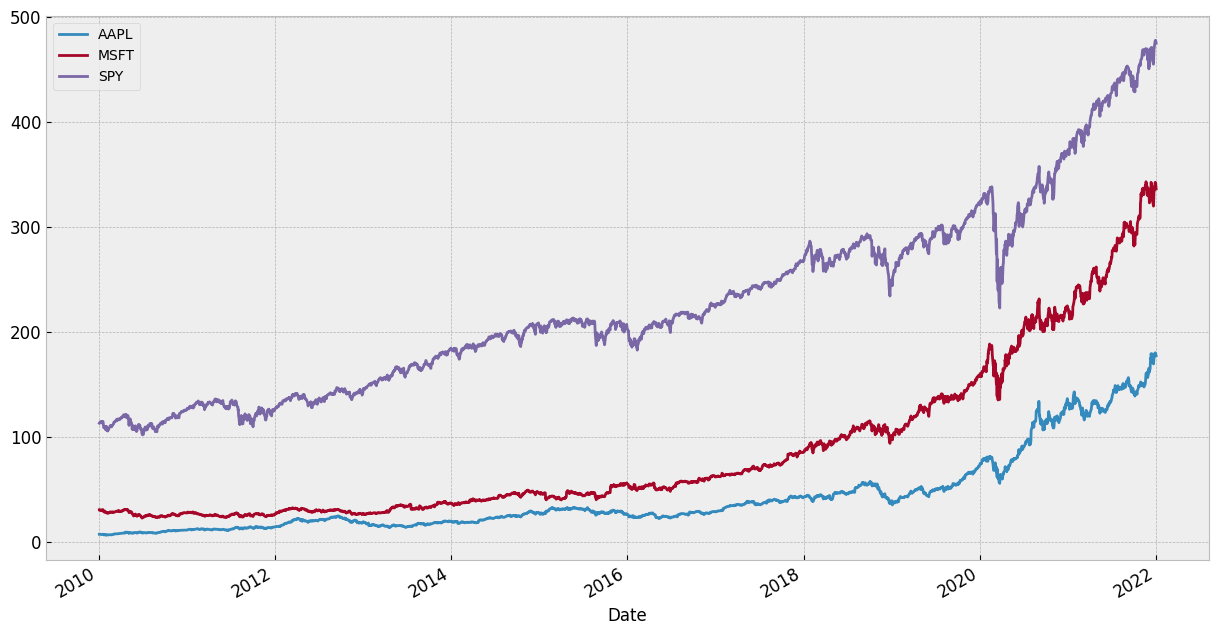

In [26]:
close.plot(figsize=(15,8),fontsize=12)

<Axes: xlabel='Date'>

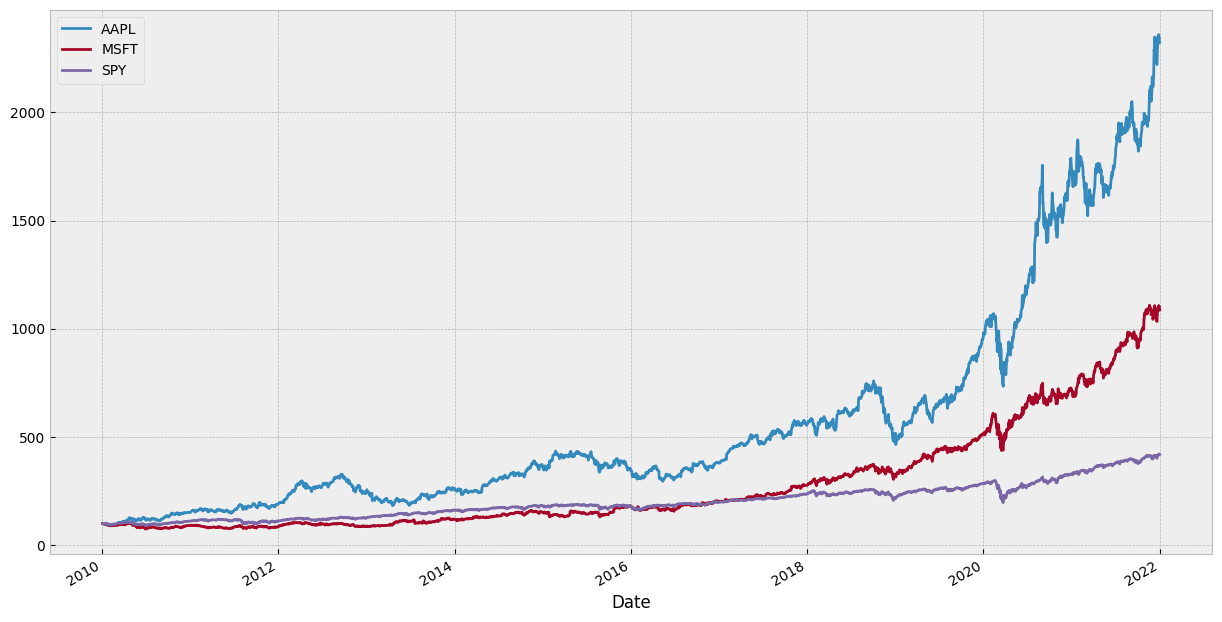

In [34]:
multiples=close.div(close.iloc[0]).mul(100)
multiples.plot(figsize=(15,8))

Here we are testing **normalization** of the data